# Project

In this project, I developed a basic neural network from the scratch, without relying on any pre-existing libraries. I then proceeded to train the implemented model on the MNIST dataset to evaluate its performance and effectiveness.

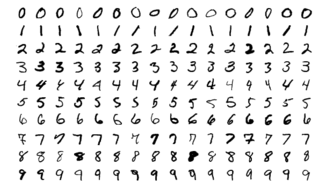

#### Reading CSV

In [2]:
let read_file_lists (filename : string) : float array array =
  let channel = open_in filename in
  let rec loop acc =
    try
      let line = input_line channel in
      let floats = Array.of_list (List.map float_of_string (String.split_on_char ',' line)) in
      loop (floats :: acc)
    with End_of_file ->
      close_in channel;
      List.rev acc
  in
  Array.of_list (loop [])

val read_file_lists : string -> float array array = <fun>


In [4]:
let all_images = read_file_lists "data/mnist_train.csv"

val all_images : float array array =
  [|[|5.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 3.; 18.; 18.; 18.; 126.; 136.;
      175.; 26.; 166.; 255.; 247.; 127.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 30.; 36.; 94.; 154.; 170.; 253.; 253.; 253.; 253.; 253.;
      225.; 172.; 253.; 242.; 195.; 64.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 49.; 238.; 253.; 253.; 

#### Shuffle array

In [5]:
let random_shuffle arr =
  let n = Array.length arr in
  for i = n - 1 downto 1 do
    let j = Random.int (i + 1) in
    let tmp = arr.(i) in
    arr.(i) <- arr.(j);
    arr.(j) <- tmp
  done

let split_array arr =
      random_shuffle arr;
      let arr1 = Array.sub arr 0 50000 in
      let arr2 = Array.sub arr 50000 10000 in
      (arr1, arr2)


val random_shuffle : 'a array -> unit = <fun>


val split_array : 'a array -> 'a array * 'a array = <fun>


#### Split it into three groups

In [6]:
let (train,validation) = split_array all_images

val train : float array array =
  [|[|8.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 29.; 114.; 198.; 255.; 255.; 255.; 226.;
      141.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 29.; 226.; 255.; 226.; 141.; 86.; 86.; 141.; 255.; 226.;
      29.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 86.; 255.; 29.; 0.; 0.; 0.; 0.; 0

#### Normalize Image

In [7]:
let find_max_row row =
  Array.fold_left max row.(0) row

let normalize_row row =
  let max_val = find_max_row row in
  Array.map (fun x -> x /. max_val) row

let normalize arr =
  Array.map normalize_row arr


val find_max_row : 'a array -> 'a = <fun>


val normalize_row : float array -> float array = <fun>


val normalize : float array array -> float array array = <fun>


#### Create One Hot labels

In [8]:
let to_onehot labels num_classes =
  let onehot_labels = Array.make_matrix (Array.length labels) num_classes 0.0 in
  Array.iteri (fun i label -> onehot_labels.(i).(int_of_float label) <- 1.0) labels;
  onehot_labels

val to_onehot : float array -> int -> float array array = <fun>


#### Extract labels and Images, create one hot, and normalizing!

In [9]:
let extract_label_images input = 
let pre_labels = Array.map (fun row -> row.(0)) input in
let labels = to_onehot pre_labels 10 in
let pre_images = Array.map (fun x -> Array.sub x 1 784) input in
let images = normalize pre_images in
(images,labels)

val extract_label_images :
  float array array -> float array array * float array array = <fun>


In [10]:
let train_x, train_y = extract_label_images train
let val_x, val_y = extract_label_images validation

val train_x : float array array =
  [|[|0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.11372549019607843; 0.447058823529411786;
      0.776470588235294135; 1.; 1.; 1.; 0.886274509803921529;
      0.552941176470588269; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.11372549019607843; 0.886274509803921529;
      1.; 0.886274509803921529; 0.552941176470588269; 

val val_x : float array array =
  [|[|0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.545098039215686225; 0.82745098039215681; 0.0274509803921568624; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.541176470588235259; 0.988235294117647101;
      0.552941176470588269; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.; 0.;
      0.541176470588235259; 0.988235294117647101; 0.917647058823529371;
      0.

#### Matrix dot product

In [13]:
let dot a b =
  let n = Array.length a in
  let m = Array.length b.(0) in
  Array.init n (fun i -> Array.init m (fun j ->
    Array.fold_left (+.) 0. (Array.mapi (fun k x -> x *. b.(k).(j)) a.(i))
  ))

val dot : float array array -> float array array -> float array array = <fun>


#### Matrix transpose

In [14]:
let transpose mat =
  let m = Array.length mat in
  let n = Array.length mat.(0) in
  Array.init n (fun i -> Array.init m (fun j -> mat.(j).(i)))

val transpose : 'a array array -> 'a array array = <fun>


#### Matrix element-wise addition

In [15]:
let add a b =
  Array.mapi (fun i row -> Array.mapi (fun j x -> x +. b.(i).(j)) row) a

val add : float array array -> float array array -> float array array = <fun>


#### Matrix element-wise subtraction

In [16]:
let sub a b =
  Array.mapi (fun i row -> Array.mapi (fun j x -> x -. b.(i).(j)) row) a

val sub : float array array -> float array array -> float array array = <fun>


#### Matrix Element-wise Multiplication

In [17]:
let mul a b =
  Array.mapi (fun i row -> Array.mapi (fun j x -> x *. b.(i).(j)) row) a

val mul : float array array -> float array array -> float array array = <fun>


#### Matrix Scalar Multiplication

In [18]:
let scalar_mul scalar mat =
  Array.map (fun row -> Array.map (fun x -> scalar *. x) row) mat

val scalar_mul : float -> float array array -> float array array = <fun>


#### Sum Square of Elements of Matrix

In [19]:
let sum_squares_2d arr = 
  let sum = ref 0.0 in
  for i = 0 to Array.length arr - 1 do
    for j = 0 to Array.length arr.(i) - 1 do
      sum := !sum +. arr.(i).(j) *. arr.(i).(j)
    done;
  done;
  (sqrt (!sum)) 

val sum_squares_2d : float array array -> float = <fun>


#### Sigmoid Activation Function

In [20]:
let sigmoid x = 1. /. (1. +. exp (-.x))

val sigmoid : float -> float = <fun>


#### Softmax

In [21]:
let softmax (input : float array array) : float array array =
  let rows = Array.length input in
  let cols = Array.length input.(0) in
  let output = Array.make_matrix rows cols 0.0 in
  for i = 0 to rows - 1 do
    let row_sum = ref 0.0 in
    for j = 0 to cols - 1 do
      row_sum := !row_sum +. exp input.(i).(j);
    done;
    for j = 0 to cols - 1 do
      output.(i).(j) <- exp input.(i).(j) /. !row_sum;
    done;
  done;
  output

val softmax : float array array -> float array array = <fun>


#### Cross-entropy loss

In [22]:
let cross_entropy_loss y_pred y_true =
  let n = Array.length y_pred in
  let loss = ref 0. in
  for i = 0 to n - 1 do
    for j = 0 to 9 do
      loss := !loss +. y_true.(i).(j) *. log y_pred.(i).(j)
    done
  done;
  (-. !loss /. 6000.)


val cross_entropy_loss : float array array -> float array array -> float =
  <fun>


#### Gradient of cross-entropy loss

In [23]:
let gradient_cross_entropy_softmax logits y_true =
  let y_pred = softmax logits in  
  let num_inputs = Array.length y_true in
  let num_classes = Array.length y_true.(0) in
  let grad = Array.make_matrix num_inputs num_classes 0.0 in
  for i = 0 to num_inputs - 1 do
    for j = 0 to num_classes - 1 do
      grad.(i).(j) <- y_pred.(i).(j) -. y_true.(i).(j)
    done;
  done;
  grad
;;


val gradient_cross_entropy_softmax :
  float array array -> float array array -> float array array = <fun>


#### Derivative of the sigmoid activation function

In [24]:
let sigmoid_deriv x = x *. (1. -. x)

val sigmoid_deriv : float -> float = <fun>


#### Apply the activation function element-wise to a matrix

In [25]:
let apply_activation mat = Array.map (fun row -> Array.map sigmoid row) mat

val apply_activation : float array array -> float array array = <fun>


#### Apply the activation function's derivative element-wise to a matrix

In [26]:
let apply_activation_deriv mat = Array.map (fun row -> Array.map sigmoid_deriv row) mat

val apply_activation_deriv : float array array -> float array array = <fun>


#### Initialize the neural network

In [27]:
let init_network input_size hidden_size output_size =
  let hidden_weights = Array.init input_size (fun _ -> Array.init hidden_size (fun _ -> Random.float 1.)) in
  let output_weights = Array.init hidden_size (fun _ -> Array.init output_size (fun _ -> Random.float 1.)) in
  (hidden_weights, output_weights)


val init_network : int -> int -> int -> float array array * float array array =
  <fun>


#### Forward Pass

In [28]:
let forward_pass (hidden_weights, output_weights) input =
  let hidden_layer =  apply_activation (dot input hidden_weights) in
  let output_layer =   (dot hidden_layer output_weights) in
  (hidden_layer, output_layer)

val forward_pass :
  float array array * float array array ->
  float array array -> float array array * float array array = <fun>


In [29]:
let to_2d_array_column arr = Array.init (Array.length arr) (fun i -> [|arr.(i)|])


val to_2d_array_column : 'a array -> 'a array array = <fun>


#### Backward pass and weight update

In [30]:
let backward_pass_adam (hidden_weights, output_weights) (hidden_layer, output_layer) input target alpha beta1 beta2 epsilon t =
  let output_error = gradient_cross_entropy_softmax output_layer target in
  let output_delta = output_error in
  let hidden_error = dot output_delta (transpose output_weights) in
  let hidden_delta = mul (apply_activation_deriv hidden_layer) hidden_error in
  
  (* Initialize first and second moments for hidden and output weights *)
  let m_hidden = Array.init (Array.length hidden_weights) (fun _ -> Array.make (Array.length hidden_weights.(0)) 0.) in
  let v_hidden = Array.init (Array.length hidden_weights) (fun _ -> Array.make (Array.length hidden_weights.(0)) 0.) in
  let m_output = Array.init (Array.length output_weights) (fun _ -> Array.make (Array.length output_weights.(0)) 0.) in
  let v_output = Array.init (Array.length output_weights) (fun _ -> Array.make (Array.length output_weights.(0)) 0.) in

  (* Compute gradients for hidden and output weights *)
  let grad_hidden = dot (transpose input) hidden_delta in
  let grad_output = dot (transpose hidden_layer) output_delta in

  (* Update first and second moments for hidden and output weights *)
  let m_hidden_t = add (scalar_mul (1. -. beta1) grad_hidden) (scalar_mul beta1 m_hidden) in
  let v_hidden_t = add (scalar_mul (1. -. beta2) (mul grad_hidden grad_hidden)) (scalar_mul beta2 v_hidden) in
  let m_output_t = add (scalar_mul (1. -. beta1) grad_output) (scalar_mul beta1 m_output) in
  let v_output_t = add (scalar_mul (1. -. beta2) (mul grad_output grad_output)) (scalar_mul beta2 v_output) in

  (* Compute bias-corrected first and second moments for hidden and output weights *)
  let m_hidden_t_corr = scalar_mul (1. /. (1. -. (beta1 ** float_of_int t))) m_hidden_t in
  let v_hidden_t_corr = scalar_mul (1. /. (1. -. (beta2 ** float_of_int t))) v_hidden_t in
  let m_output_t_corr = scalar_mul (1. /. (1. -. (beta1 ** float_of_int t))) m_output_t in
  let v_output_t_corr = scalar_mul (1. /. (1. -. (beta2 ** float_of_int t))) v_output_t in

  (* Update hidden and output weights using the Adam optimizer *)
  let hidden_weights_updated = sub hidden_weights (scalar_mul alpha (mul m_hidden_t_corr (Array.map (fun row -> Array.map (fun x -> 1. /. (sqrt x +. epsilon)) row) v_hidden_t_corr))) in
  let output_weights_updated = sub output_weights (scalar_mul alpha (mul m_output_t_corr (Array.map (fun row -> Array.map (fun x -> 1. /. (sqrt x +. epsilon)) row) v_output_t_corr))) in

  let cross_entropy_loss_value = cross_entropy_loss (softmax output_layer) target in

  (hidden_weights_updated, output_weights_updated), cross_entropy_loss_value


val backward_pass_adam :
  float array array * float array array ->
  float array array * float array array ->
  float array array ->
  float array array ->
  float ->
  float ->
  float -> float -> int -> (float array array * float array array) * float =
  <fun>


#### Training loop

In [31]:
let train_network network_start input target epochs alpha beta1 beta2 epsilon =
  let rec loop network t =
    if t <= epochs then
      let (hidden_layer, output_layer) = forward_pass network input in
      let network_updated, cross_entropy_loss_value = backward_pass_adam network (hidden_layer, output_layer) input target alpha beta1 beta2 epsilon t in
      
      Printf.printf "Epoch %d, Loss Error: %.2f\n" t cross_entropy_loss_value;
      print_newline ();
      loop network_updated (t + 1)
    else
      network
  in
  loop network_start 1


val train_network :
  float array array * float array array ->
  float array array ->
  float array array ->
  int ->
  float -> float -> float -> float -> float array array * float array array =
  <fun>


#### Accuracy Function

In [32]:
let accuracy onehot_labels outputs =
  let soft_outputs = softmax outputs in
  let num_correct = ref 0 in
  for i = 0 to Array.length onehot_labels - 1 do
    let max_index = ref (-1) in
    let max_value = ref (-1.0) in
    for j = 0 to Array.length soft_outputs.(0) - 1 do
      if soft_outputs.(i).(j) > !max_value then (
        max_value := soft_outputs.(i).(j);
        max_index := j;
      )
    done;
    if onehot_labels.(i).(!max_index) = 1.0 then
      num_correct := !num_correct + 1
  done;
  float_of_int !num_correct /. float_of_int (Array.length onehot_labels)


val accuracy : float array array -> float array array -> float = <fun>


#### Define Network

In [34]:
let input_size = 784
let hidden_size = 100
let output_size = 10
let epochs = 10
let alpha = 0.1
let beta1 = 0.9
let beta2 = 0.999
let epsilon = 1e-8

val input_size : int = 784


val hidden_size : int = 100


val output_size : int = 10


val epochs : int = 10


val alpha : float = 0.1


val beta1 : float = 0.9


val beta2 : float = 0.999


val epsilon : float = 1e-08


#### Training and Validation

In [35]:
let network = init_network input_size hidden_size output_size

val network : float array array * float array array =
  ([|[|0.171194293695167837; 0.457870976556418952; 0.517912186576882538;
       0.160642345684963467; 0.928405773650903932; 0.158826617666567416;
       0.342039062149418482; 0.260486747208521552; 0.372633732010591856;
       0.448374740001502181; 0.646751868214596626; 0.506098252920776481;
       0.952304319181437098; 0.71004478121764647; 0.315348294853267541;
       0.0509693080659550934; 0.695767656315747773; 0.729600304020371682;
       0.242184043362492163; 0.278086573629109934; 0.471328818433173591;
       0.648955217728665; 0.332056481514012569; 0.226470499963636052;
       0.213836831489431389; 0.518912430856078188; 0.850013699479186591;
       0.85159566549639687; 0.0306672026622096215; 0.197927497483711468;
       0.0781677251991447913; 0.184728792134310732; 0.382839204393488786;
       0.935303379677633662; 0.873935631089120313; 0.301180758083773148;
       0.343032589968259; 0.784026772805796912; 0.927514441291623082;
  

In [ ]:
let trained_network = train_network network train_x train_y epochs alpha beta1 beta2 epsilon

In [ ]:
let (_, pred) = forward_pass trained_network val_x in 
let acc = accuracy val_y pred in
Printf.printf "Accuracy on validation: %f\n" acc;
print_newline ();